In [15]:
from music21 import *
import music21
import numpy as np
import os
import random
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from sklearn.model_selection import train_test_split

In [6]:
import tensorflow as tf
sess = tf.Session()
from keras import backend as K
K.set_session(sess)

In [7]:
import pickle

In [12]:
train_data = []
for file_path in os.listdir('./training_data/'):
    with open('./training_data/'+file_path, 'rb') as f:
        try:
            data = pickle.load(f)
            train_data.append(data)
        except:
            print("tried to load",file_path,"but failed.")

In [13]:
def show(x):
    plt.imshow(x[...,0],cmap='gray')

In [14]:
def transform_vector(old_vector,tag):
    vector = copy.deepcopy(old_vector)
    for i in range(0,len(vector)):
        sub_vector = [[0] for x in list(range(0,128))]
        #print(len(sub_vector))
        #print(vector[i])
        try:
            sub_vector[int(vector[i])] = [1]
        except:
            print("silence found")
        vector[i] = sub_vector
    if (tag==-1):
        return np.asarray(vector)
    vector.append([[tag] for x in list(range(0,128))])
    return np.asarray(vector)

In [10]:
random_vector = [random.randint(30,60) for x in list(range(0,16))]

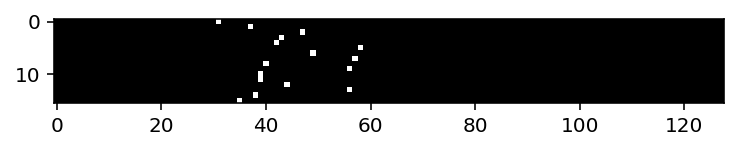

In [73]:
data_matrix = transform_vector(random_vector,0)
show(data_matrix)

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found


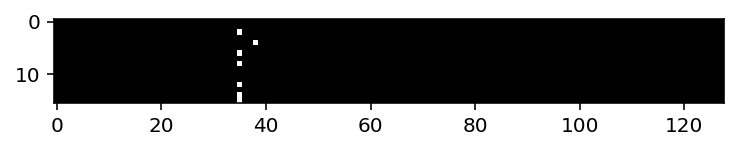

In [108]:
data_matrix = transform_vector(train_data[0][1][10],-1)
show(data_matrix)

In [13]:
# Final data preprocessing

In [14]:
X = []
for song in train_data:
    for measure in song[0]:
        data_matrix = transform_vector(measure,1)
        #data_matrix=np.append(data_matrix,1) # tag
        X.append(data_matrix)

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

In [15]:
for i in range(0,780):
    data_matrix = transform_vector([random.randint(0,128) for x in list(range(0,16))],0)
    #data_matrix=np.append(data_matrix,0) # tag
    X.append(data_matrix)

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

In [16]:
from random import shuffle

In [17]:
Y = [x[16] for x in X]

In [18]:
np.asarray(Y).shape

(1560, 128, 1)

In [19]:
Y = [[y[0][0]] for y in Y]

In [20]:
np.asarray(Y)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [21]:
np.asarray(Y).shape

(1560, 1)

In [22]:
X = [x[:16] for x in X]

In [23]:
np.asarray(X).shape

(1560, 16, 128, 1)

In [24]:


x_train, x_val, y_train, y_val = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.2, random_state=42)

In [25]:
x_train.shape

(1248, 16, 128, 1)

In [26]:
# Modelo

In [17]:
from keras.models import Model
from keras.layers import Input, Conv2D, add,Conv2DTranspose

In [33]:
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Lambda
from keras.layers import concatenate
from keras.layers import Reshape
from keras.backend import shape
from keras import backend
from keras import Sequential

In [19]:
from keras.layers import InputLayer

In [20]:
from keras.losses import binary_crossentropy

In [31]:
y_train.shape

(1248, 1)

In [32]:
def get_discriminator():
    layers = {}
    # discriminator
    m_in = Input((16,128,1)) # input data layer
    layers[0] = Conv2D(kernel_size=(2,128),nb_filter = 14, padding='same', strides=2, activation='relu')(m_in)
    layers[1] = Conv2D(kernel_size=(4,1),nb_filter = 77, padding='same', strides=2, activation='relu')(layers[0])
    layers[2] = Dense(units=y_train.shape[1])(layers[1])
    layers[3] = Flatten()(layers[2]) # se usó flatten para convertir los resultados a 1 dimensión
    m_out = Dense(units=y_train.shape[1],activation='sigmoid')(layers[3]) # y finalmente una nueva capa densa para transformar los resultados a la forma de y (30,)
    model = Model(m_in, m_out)
    model.compile('adam', loss='mse', metrics=['mae'])
    model.summary()
    return model
#m_out = Dense(units=1, activation='sigmoid')(m_in)

In [33]:
d_model = get_discriminator()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16, 128, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 64, 14)         3598      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 32, 77)         4389      
_________________________________________________________________
dense_1 (Dense)              (None, 4, 32, 1)          78        
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,194
Trainable params: 8,194
Non-trainable params: 0
_________________________________________________________________


/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(2, 128), padding="same", strides=2, activation="relu", filters=14)`
  """
/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(4, 1), padding="same", strides=2, activation="relu", filters=77)`
  


In [34]:
bs = 20
log = d_model.fit(x_train, 
                y_train, bs, epochs=20, 
                validation_data=[x_val, 
                                 y_val])

Train on 1248 samples, validate on 312 samples
Epoch 1/20
1248/1248 [==============================] - 1s 1ms/step - loss: 0.5151 - mean_squared_error: 0.1709 - val_loss: 0.1704 - val_mean_squared_error: 0.0455
Epoch 2/20
1248/1248 [==============================] - 0s 229us/step - loss: 0.0549 - mean_squared_error: 0.0115 - val_loss: 0.0081 - val_mean_squared_error: 3.8914e-04
Epoch 3/20
1248/1248 [==============================] - 0s 166us/step - loss: 0.0045 - mean_squared_error: 1.6763e-04 - val_loss: 0.0026 - val_mean_squared_error: 4.6998e-05
Epoch 4/20
1248/1248 [==============================] - 0s 161us/step - loss: 0.0017 - mean_squared_error: 2.4097e-05 - val_loss: 0.0013 - val_mean_squared_error: 1.3501e-05
Epoch 5/20
1248/1248 [==============================] - 0s 170us/step - loss: 9.1875e-04 - mean_squared_error: 6.8443e-06 - val_loss: 8.5287e-04 - val_mean_squared_error: 6.5149e-06
Epoch 6/20
1248/1248 [==============================] - 0s 177us/step - loss: 5.7968e-04 

In [97]:
def get_generator():
    c_layers = {}
    #conditioner
    c_m_in = Input((16,128,1)) # input data layer
    c_layers[0] = Conv2D(kernel_size=(1,128),nb_filter = 16, strides=(1,2), padding='same', activation='relu')(c_m_in)
    c_layers[1] = Conv2D(kernel_size=(2,1),nb_filter = 16, strides=(1,2),padding='same', activation='relu')(c_layers[0])
    c_layers[2] = Conv2D(kernel_size=(2,1),nb_filter = 16, strides=(1,2),padding='same', activation='relu')(c_layers[1])
    c_layers[3] = Conv2D(kernel_size=(2,1),nb_filter = 256, strides=(1,2),padding='same', activation='relu')(c_layers[2])
    #model = Model(c_m_in, c_layers[3])
    #model.compile('adam', loss='mse', metrics=['mse'])
    #model.summary()
    
    # communication layers
    #com_c4 = Reshape((256,512))(c_layers[3])
    
    
    #generator
    g_layers = {}
    g_m_in = Input((100,1))
    g_layers[0] = Dense(units=1024,activation='relu')(g_m_in)
    g_layers[1] = Dense(units=512,activation='relu') (g_layers[0])
    print("Last dense layer",g_layers[1]._keras_shape)
    print(c_layers[3]._keras_shape)
    com_g1 = Reshape((-1,2,128))(g_layers[1])
    com_c3 = Reshape((-1,2,128))(c_layers[3])
    merge1 = concatenate([com_g1,com_c3],axis=1)
    print("Merge",merge1._keras_shape)
    #r_m1 = Reshape((356,512,1))(merge1)
    #print(r_m1._keras_shape)
    
    
    # first transpose
    print("--")
    g_layers[2] =Conv2DTranspose(kernel_size=(2,1),nb_filter=16,strides=(2,2), activation='relu')(merge1)
    print("Conv2DTranspose 1",g_layers[2]._keras_shape)
    print(c_layers[2]._keras_shape)
    com_g2 = Reshape((-1,4,128))(g_layers[2])
    com_c2 = Reshape((-1,4,128))(c_layers[2])
    merge2 = concatenate([com_c2,com_g2],axis=1)
    print("Merge",merge2._keras_shape)
    
    # second transpose
    print("--")
    g_layers[3] = Conv2DTranspose(kernel_size=(2,1),nb_filter=16*2,strides=(2,2), activation='relu')(merge2)
    print("Conv2DTranspose 2",g_layers[3]._keras_shape)
    print(c_layers[1]._keras_shape)
    com_g3 = Reshape((-1,8,128))(g_layers[3])
    com_c1 = Reshape((-1,8,128))(c_layers[1])
    merge3 = concatenate([com_c1,com_g3],axis=1)
    print("Merge",merge3._keras_shape)
    
    # thrid transpose
    print("--")
    g_layers[4] = Conv2DTranspose(kernel_size=(2,1),nb_filter=16*4,strides=(2,2), activation='relu')(merge3)
    print("Conv2DTranspose 3",g_layers[4]._keras_shape)
    print(c_layers[2]._keras_shape)
    com_g4 = Reshape((-1,16,128))(g_layers[4])
    com_c0 = Reshape((-1,16,128))(c_layers[0])
    merge4 = concatenate([com_c0,com_g4],axis=1)
    print("Merge",merge4._keras_shape)
    
    # fourth transpose
#     print("--")
#     g_layers[5] = Conv2DTranspose(kernel_size=(1,128),nb_filter=128,strides=(1,2),output_shape=(-1,16,128), activation='relu')(merge4)
#     print("Conv2DTranspose 4",g_layers[5]._keras_shape)
# #     g_layers[2] =Conv2DTranspose(kernel_size=(1,2),strides=2)
# #     g_layers[2].Add()
# #     g_layers[2] =Conv2DTranspose(kernel_size=(1,2),strides=2)
# #     g_layers[2].Add()
# #     g_layers[2] =Conv2DTranspose(kernel_size=(1,2),strides=2)
# #     g_layers[2].Add()
#     com_g5 = Reshape((-1,16,128))(g_layers[5])
#     print(com_g5._keras_shape)
    m_out = Lambda(lambda x: K.sum(x, axis=0), output_shape=lambda s: (None,16, 128,1))(merge4)
    #m_out = Dense(units=128, activation='sigmoid')(com_g5)
    
    #m_out = Dense(units=(128,16,1), activation='sigmoid')(com_x1)
    print("Final output",m_out._keras_shape)
    model = Model(input=[c_m_in,g_m_in],output=m_out)
    model.compile('adam', loss='mse', metrics=['mae'])
    model.summary()
    return model

In [98]:
g_model = get_generator()

/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(1, 128), strides=(1, 2), padding="same", activation="relu", filters=16)`
  """
/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(2, 1), strides=(1, 2), padding="same", activation="relu", filters=16)`
  
/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(2, 1), strides=(1, 2), padding="same", activation="relu", filters=16)`
  import sys
/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(2, 1), strides=(1, 2), padding="same", activation="relu

Last dense layer (None, 100, 512)
(None, 16, 8, 256)
Merge (None, 328, 2, 128)
--
Conv2DTranspose 1 (None, 656, 4, 16)
(None, 16, 16, 16)
Merge (None, 90, 4, 128)
--
Conv2DTranspose 2 (None, 180, 8, 32)
(None, 16, 32, 16)
Merge (None, 53, 8, 128)
--
Conv2DTranspose 3 (None, 106, 16, 64)
(None, 16, 16, 16)
Merge (None, 61, 16, 128)
Final output (None, 16, 128, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_59 (InputLayer)           (None, 16, 128, 1)   0                                            
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 16, 64, 16)   2064        input_59[0][0]                   
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16

/home/sdelrio/anaconda3/envs/bitgamingmusic/lib/python3.6/site-packages/ipykernel_launcher.py:79: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("la...)`


In [99]:
def white_noise():
    mean = 0
    std = 1 
    num_samples = 100
    samples = np.random.normal(mean, std, size=num_samples)
    return [[x] for x in samples]


In [100]:
X = []
for song in train_data:
    sub_x=[]
    for measure in song[0]:
        data_matrix = transform_vector(measure,-1)
        #data_matrix=np.append(data_matrix,1) # tag
        sub_x.append([data_matrix])
    for i in range(0,len(sub_x)-1):
        sub_x[i].append(sub_x[i+1][0])
    for s in sub_x:
        #print(len(s))
        if (len(s)==1):
            continue
        #print(len(s[0]))
        #print(s[0])
        if (sum(sum(sum(s[0])))==0 and sum(sum(sum(s[1])))==0):
            continue
        #print('wut')
        X.append(s)

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silence found
silenc

In [101]:
len(X)

758

In [102]:
Y = [x[1] for x in X]

In [103]:
len(Y)

758

In [104]:
X = [x[0] for x in X]

In [105]:
x_train, x_val, y_train, y_val = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.2, random_state=42)

In [ ]:
bs = 20
log = g_model.fit([x_train,np.asarray([white_noise() for x in list(range(0,len(x_train)))])], 
                y_train, bs, epochs=5, 
                validation_data=[[x_val,np.asarray([white_noise() for x in list(range(0,len(x_val)))])], 
                                 y_val])

Train on 606 samples, validate on 152 samples
Epoch 1/5


In [38]:
def dcgan_gen():
    model = Sequential()

    model.add(Dense(128 * 7 * 7, activation="relu", input_dim=100))
    model.add(Reshape((7, 7, 128)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Conv2D(1, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))

    model.summary()


In [39]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [40]:
dcgan_gen()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_12 (Reshape)         (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 28, 28, 128)       0         
__________